<a href="https://colab.research.google.com/github/gnaneshwar7781/UsedCarPricePrediction/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In this kernel we'll be working on Vehicle dataset, which contains information about used cars listed on www.cardekho.com. We are going to use the dataset for predicting the price with the help of regression models.

The datasets consist of several independent variables include:

* Car_Name
* Year
* Selling_Price
* Present_Price
* Kms_Driven
* Fuel_Type
* Seller_Type
* Transmission
* Owner

# **Import required Libraries & Data Loading**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
car_data=pd.read_csv('/content/cardata.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **Statistics**

In [5]:
print('Shape of dataframe : {}'.format(car_data.shape))

Shape of dataframe : (301, 9)


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
#Checking null values
print('Missing Values :\n{}'.format(car_data.isnull().sum()))

Missing Values :
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


Let's see the dtype of features

In [9]:
print('DType of features :\n{}'.format(car_data.dtypes))

DType of features :
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


Let's see the unique values and their counts present in the object types of features

In [10]:
print('Unique values and counts in object type features :\n')
print(car_data['Car_Name'].value_counts(),'\n')
print(car_data['Fuel_Type'].value_counts(),'\n')
print(car_data['Seller_Type'].value_counts(),'\n')
print(car_data['Transmission'].value_counts(),'\n')

Unique values and counts in object type features :

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64 

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64 



In [11]:
car_data['age_of_car']=2020-car_data['Year']
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


# **Exploratory Data Analysis (EDA)**

**Number of cars sold each year**

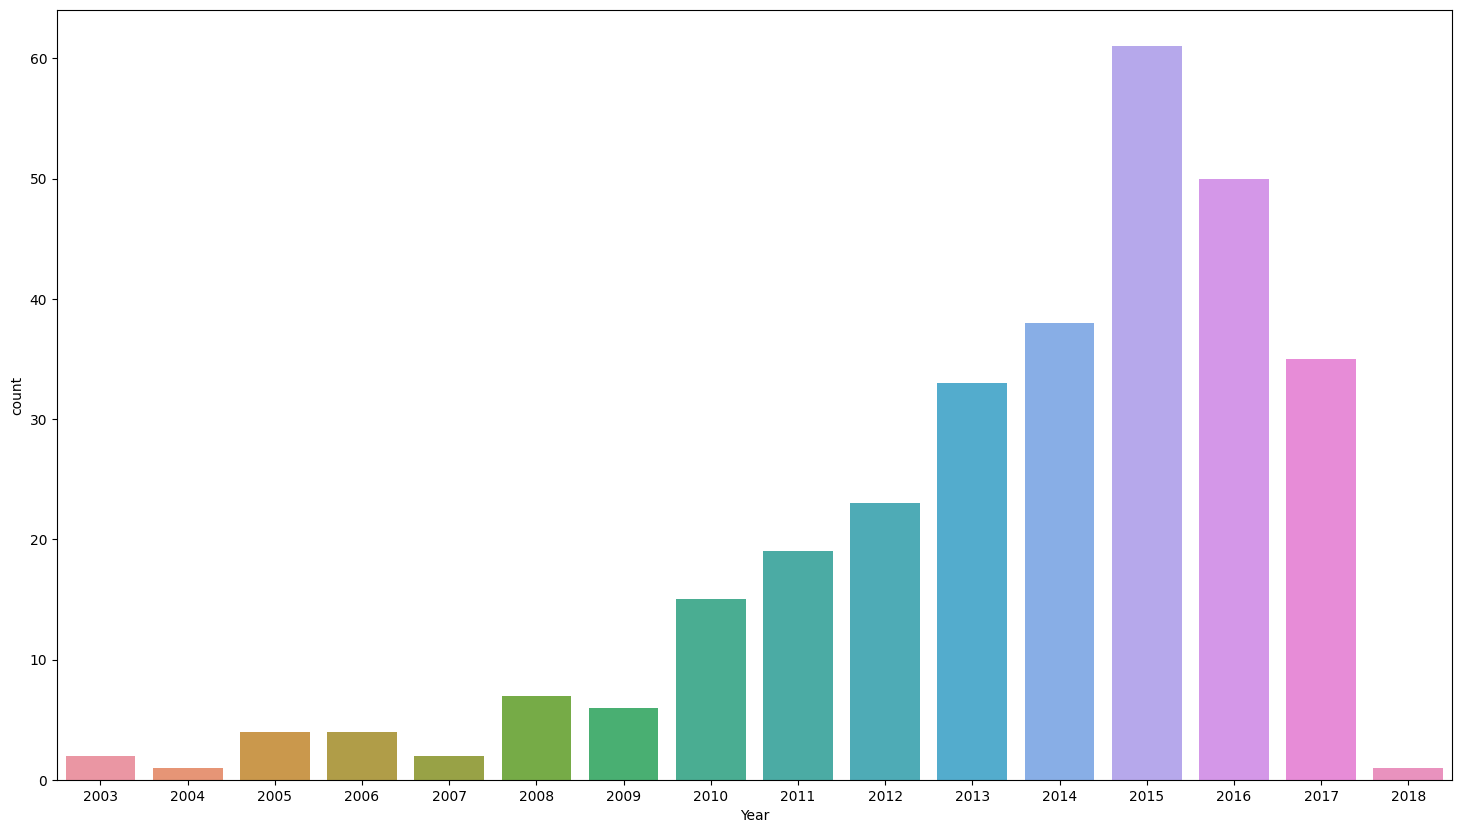

In [12]:
fig,ax=plt.subplots(figsize=(18,10))
ax=sns.countplot(x='Year',data=car_data)

**Majority of cars were sold in the year 2015 and 2016**

# **Variation in Selling_Price due to other features**

**Fuel_Type**

Text(0.5, 1.0, 'Variation in selling price of cars due to different fuel type')

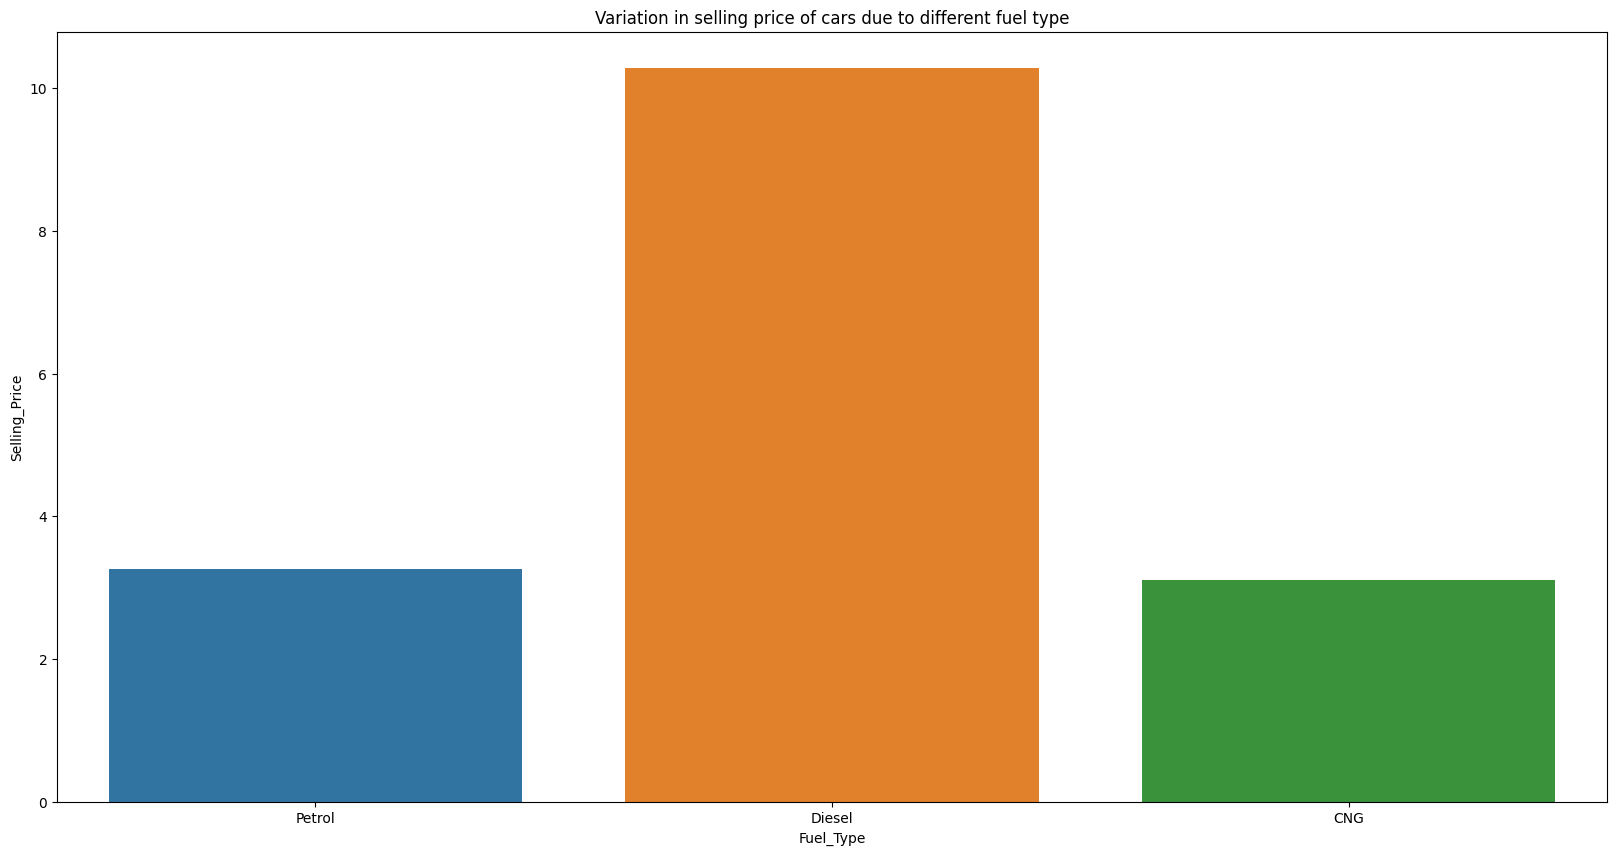

In [13]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x='Fuel_Type',y='Selling_Price',data=car_data,ci=None)
plt.title('Variation in selling price of cars due to different fuel type')

**Diesel cars cause huge variation in Selling_Price compared to petrol and CNG cars. Hence. diesel cars have a better selling price**

**Distance Travelled by the car**

Text(0.5, 1.0, 'Variation in selling price of cars due to distance travelled by car')

<Figure size 2000x1000 with 0 Axes>

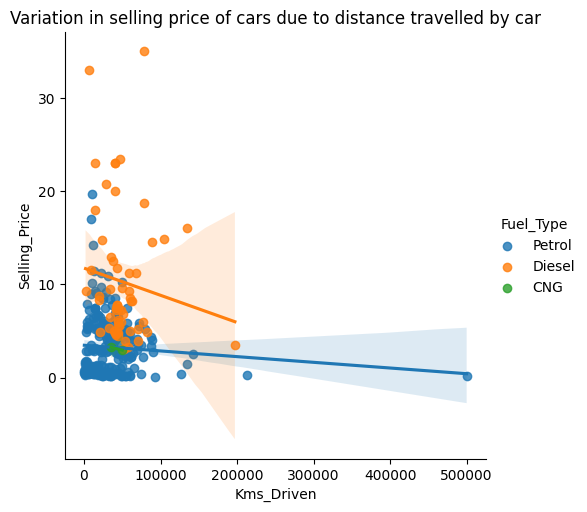

In [14]:
fig=plt.figure(figsize=(20,10))
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=car_data,hue='Fuel_Type')
plt.title('Variation in selling price of cars due to distance travelled by car')

**More is the distance travelled by the car lesser is the selling price of the car.**

**Number of Owners and Transmission**

Text(0.5, 1.0, 'Variation in selling price of cars due to the number of owners and transmission')

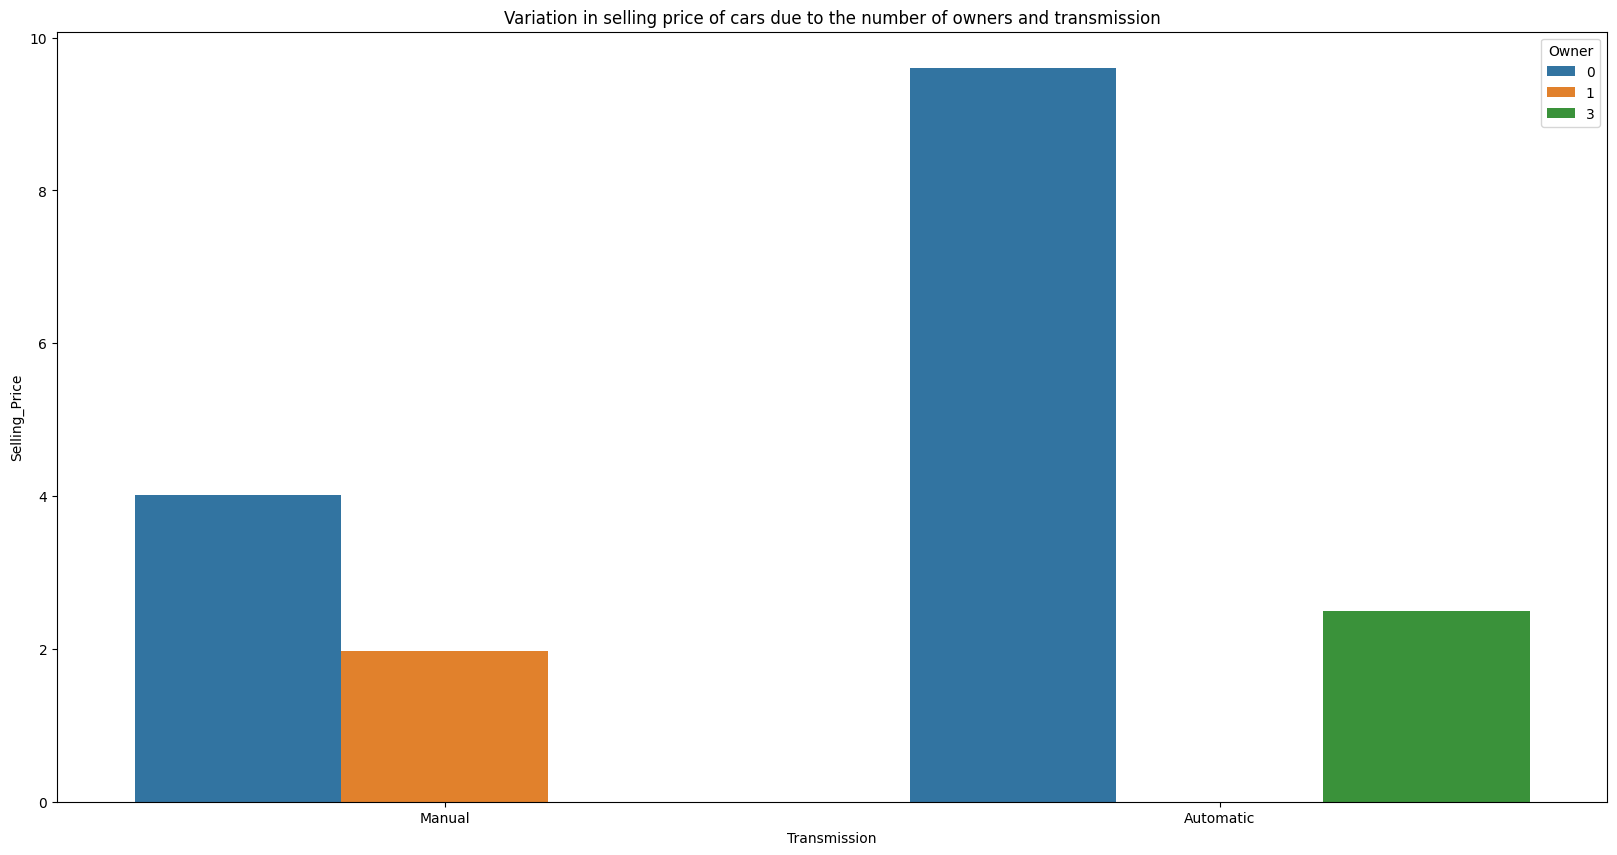

In [15]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x='Transmission',y='Selling_Price',data=car_data,hue='Owner',ci=None)
plt.title('Variation in selling price of cars due to the number of owners and transmission')

**People prefer cars which are automatic and has lesser number of owners, for purchase.**

**Type of Seller**

Text(0.5, 1.0, 'Variation in selling price of cars due to the seller type and the number of owners the car earlier had.')

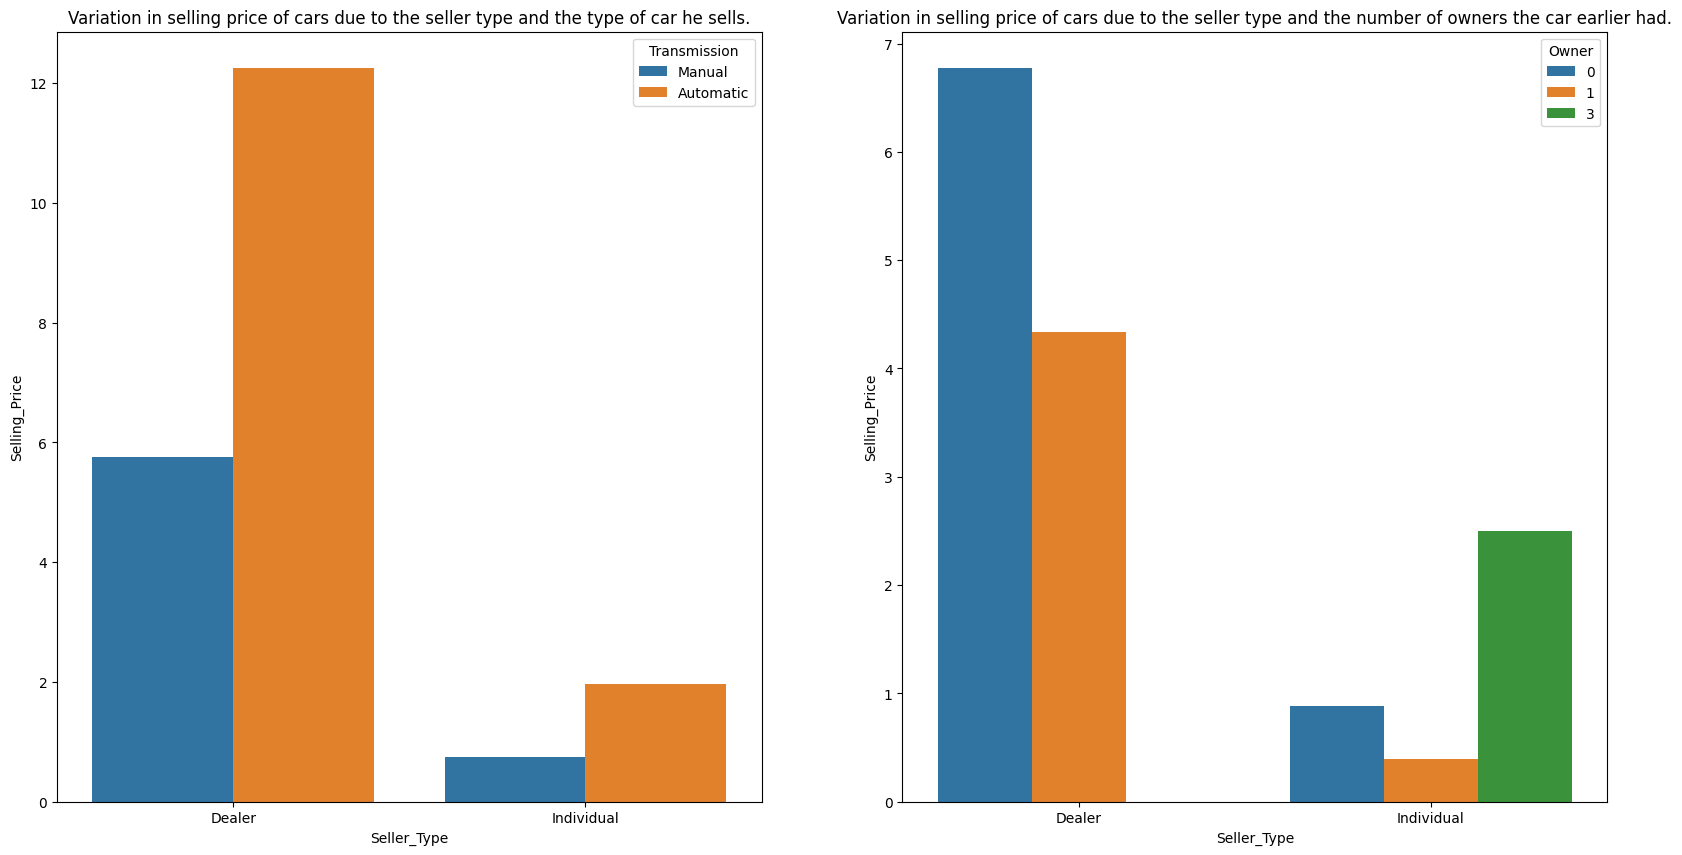

In [16]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x='Seller_Type',y='Selling_Price',data=car_data,hue='Transmission',ax=ax[0],ci=None)
ax[0].set_title('Variation in selling price of cars due to the seller type and the type of car he sells.')
sns.barplot(x='Seller_Type',y='Selling_Price',data=car_data,hue='Owner',ax=ax[1],ci=None)
ax[1].set_title('Variation in selling price of cars due to the seller type and the number of owners the car earlier had.')

**From above, it can be infered that a dealer will sell the car in better price provided the car is of automatic type and had lesser number of owners previously.**

**Age of Car**

Text(0.5, 1.0, 'Variation in selling price of cars due to age of the car')

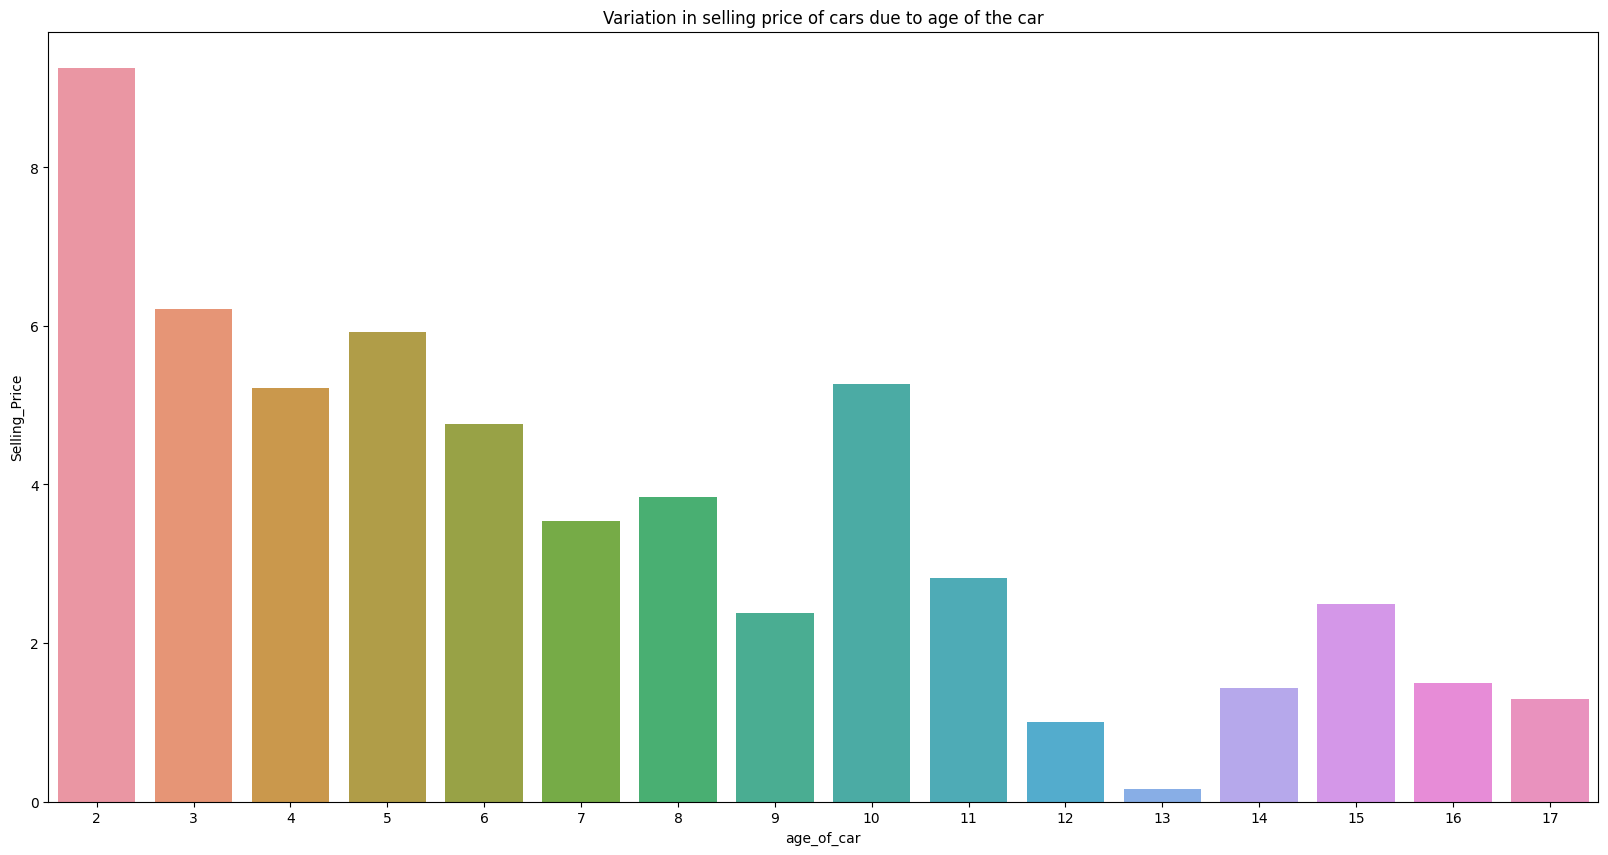

In [17]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x='age_of_car',y='Selling_Price',data=car_data,ci=None)
plt.title('Variation in selling price of cars due to age of the car')

Cars having lesser age have a better selling price compared to older cars

Text(0.5, 1.0, 'Variation in selling price of cars due to age of the car and number of owners')

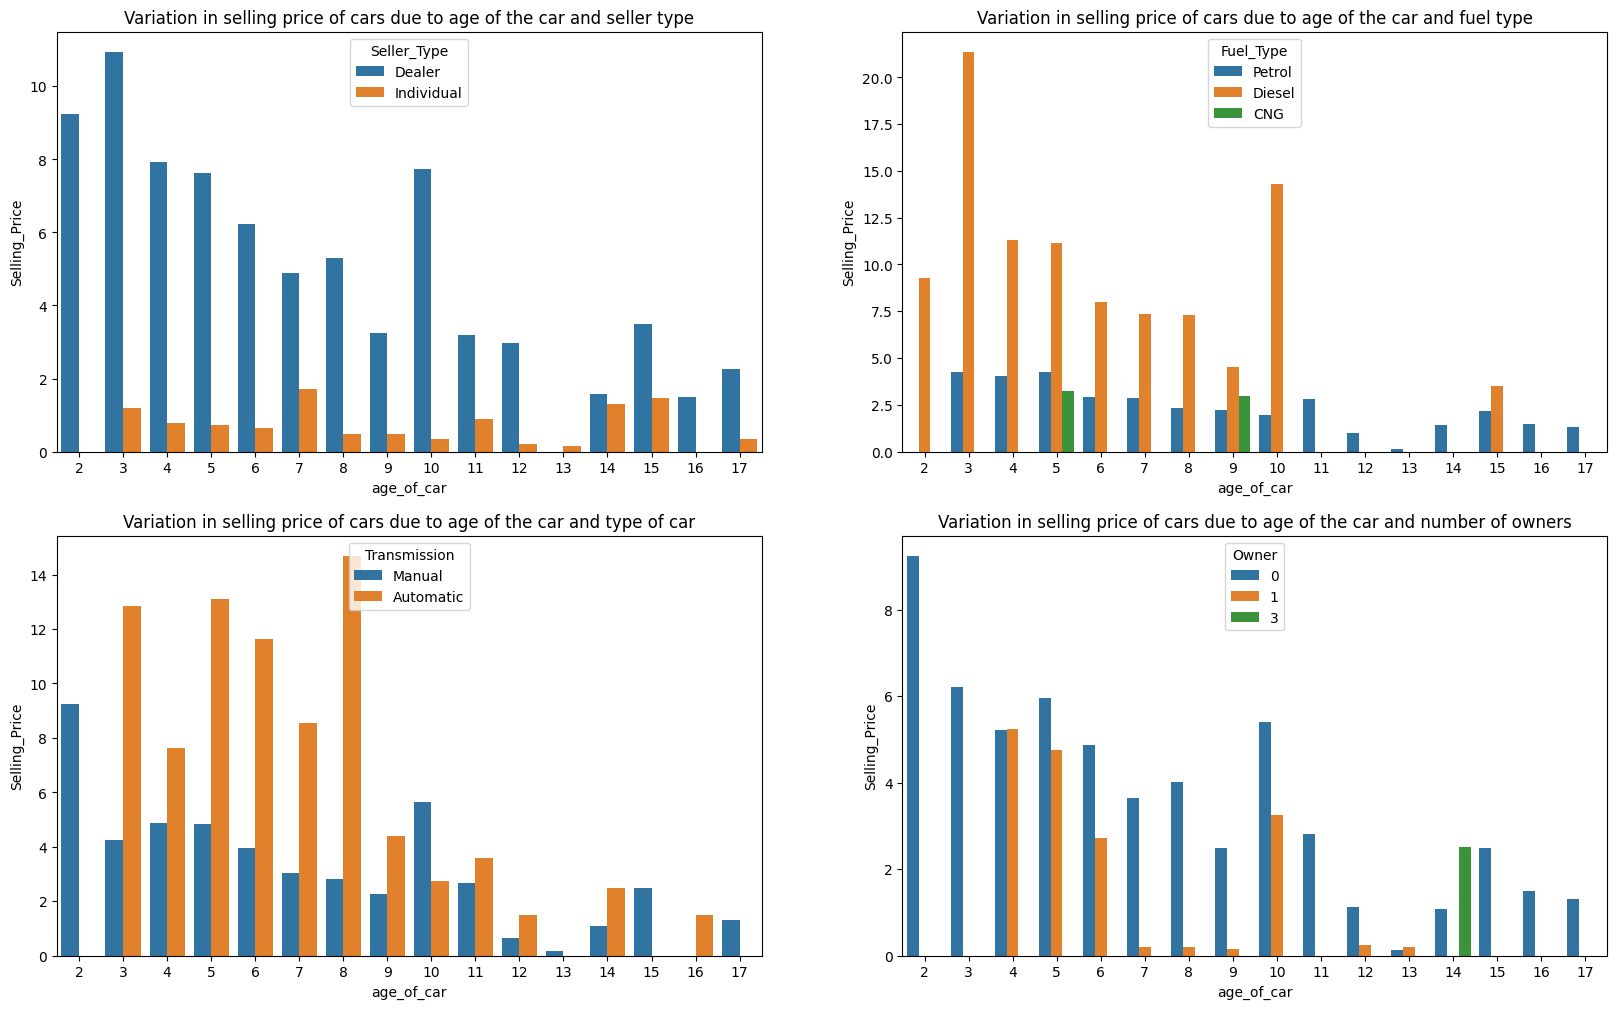

In [18]:
fig,ax=plt.subplots(2,2,figsize=(20,12))
sns.barplot(x='age_of_car',y='Selling_Price',data=car_data,hue='Seller_Type',ax=ax[0][0],ci=None)
ax[0][0].set_title('Variation in selling price of cars due to age of the car and seller type')
sns.barplot(x='age_of_car',y='Selling_Price',data=car_data,hue='Fuel_Type',ax=ax[0][1],ci=None)
ax[0][1].set_title('Variation in selling price of cars due to age of the car and fuel type')
sns.barplot(x='age_of_car',y='Selling_Price',data=car_data,hue='Transmission',ax=ax[1][0],ci=None)
ax[1][0].set_title('Variation in selling price of cars due to age of the car and type of car')
sns.barplot(x='age_of_car',y='Selling_Price',data=car_data,hue='Owner',ax=ax[1][1],ci=None)
ax[1][1].set_title('Variation in selling price of cars due to age of the car and number of owners')

**Cars having age of 2 years which is automatic and diesel with lesser number of owners have a high selling price.**

**Variation in Selling Price and Present Price**

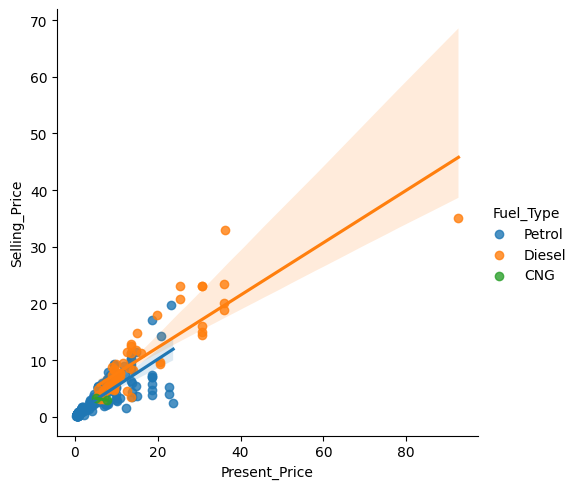

In [19]:
sns.lmplot(x='Present_Price',y='Selling_Price',data=car_data,hue='Fuel_Type')

The inference drawn is that selling price increases with the present price.

**Once EDA is completed, categorical variables have to be handled. It is done because machine learning model is only able to work with numerical data and not categorical data.**

**It can be done in 3 ways :**
* **Removing all the categorical features**(not fruitful for us since our 50% of features are categorical)
* **Using LabelEncoding**
* **Using OneHotEncoder**

****I am using **LabelEncoder******

In [20]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
car_data['fuel_type']=le.fit_transform(car_data['Fuel_Type'])
car_data['seller_type']=le.fit_transform(car_data['Seller_Type'])
car_data['transmission']=le.fit_transform(car_data['Transmission'])
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car,fuel_type,seller_type,transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,2,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,2,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,2,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,1,0,1


**Once all the categorical features are converted into numerical features we can drop the categorical features**

In [21]:
car_data.drop(['Car_Name','Fuel_Type','Seller_Type','Transmission'],axis=1,inplace=True)
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_car,fuel_type,seller_type,transmission
0,2014,3.35,5.59,27000,0,6,2,0,1
1,2013,4.75,9.54,43000,0,7,1,0,1
2,2017,7.25,9.85,6900,0,3,2,0,1
3,2011,2.85,4.15,5200,0,9,2,0,1
4,2014,4.60,6.87,42450,0,6,1,0,1


# **Identification of Features and Target Variable**

In [22]:
#Since we have to predict the selling proce of the cars, the target variable is Selling_Price
features=['Year','Present_Price','Kms_Driven','Owner','age_of_car','fuel_type','seller_type','transmission']
X=car_data.loc[:,features]
y=car_data.loc[:,'Selling_Price']

# **Splitting the Data into Train and Test**

**The data is divided using the train_test_split method present in sklearn library**

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [24]:
print('Shape of X_train : {} and y_train : {}'.format(X_train.shape,y_train.shape))
print('Shape of X_test : {} and y_test : {}'.format(X_test.shape,y_test.shape))

Shape of X_train : (210, 8) and y_train : (210,)
Shape of X_test : (91, 8) and y_test : (91,)


In [25]:
y_test=y_test.reset_index()
y_test

,index,Selling_Price
0,285,7.40
1,248,4.00
2,150,0.50
3,217,3.15
4,107,1.25
...,...,...
86,225,2.70
87,138,0.60
88,127,0.75
89,208,7.90


# **Training the model**

**1. Linear Regression**

In [26]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=linreg.predict(X_test)
df_linear=pd.DataFrame(y_pred)
df_linear.head()

,0
0,7.784825
1,2.919202
2,-0.634582
3,4.192363
4,0.496079


**2. Ridge Regression**

In [28]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [29]:
ridge_predict=ridge.predict(X_test)
df_ridge=pd.DataFrame(ridge_predict)
df_ridge.head()

,0
0,7.777167
1,2.919563
2,-0.632746
3,4.192906
4,0.498576


**3. Lasso Regression**

In [30]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [31]:
lasso_predict=lasso.predict(X_test)
df_lasso=pd.DataFrame(lasso_predict)
df_lasso.head()

,0
0,6.788073
1,2.870668
2,-0.315118
3,4.149736
4,0.887544


**Plotting the actual Y VS predicted Y for various regression techniques.**

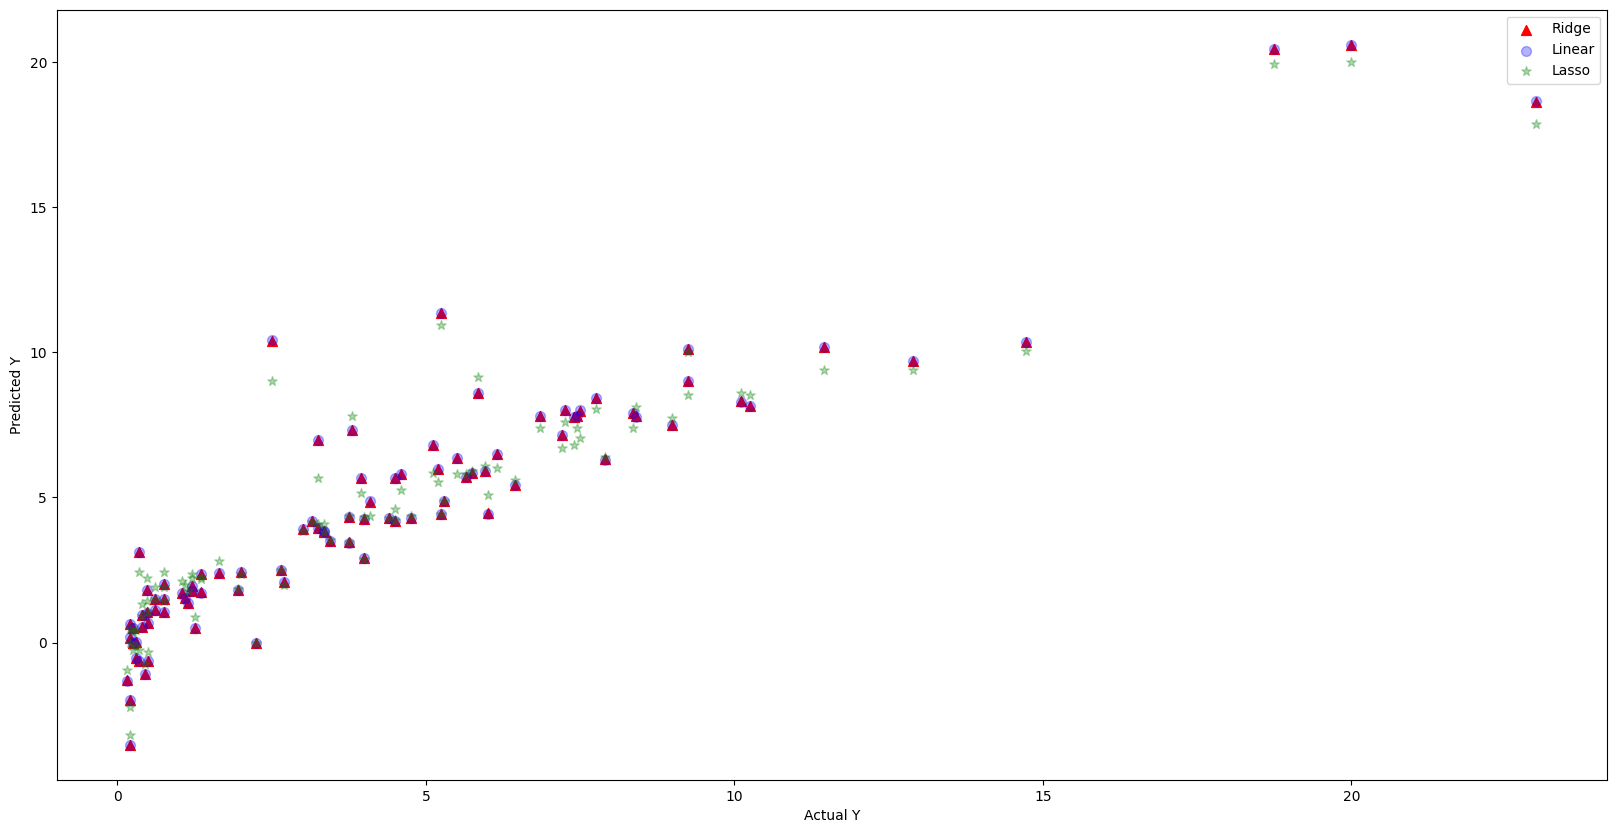

In [32]:
fig,ax=plt.subplots(figsize=(20,10))
plt.scatter(y_test['Selling_Price'],df_ridge,marker='^',s=50,color='r',label='Ridge')
plt.scatter(y_test['Selling_Price'],df_linear,marker='o',s=50,alpha=0.3,color='b',label='Linear')
plt.scatter(y_test['Selling_Price'],df_lasso,marker='*',s=50,alpha=0.3,color='g',label='Lasso')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.legend()
plt.show()

**Checking the R2 scores for various regression techniques**

In [33]:
from sklearn.metrics import r2_score
r2={}
r2['Linear_Regression']=r2_score(y_test['Selling_Price'],df_linear)
r2['Ridge_Regression']=r2_score(y_test['Selling_Price'],df_ridge)
r2['Lasso_Regression']=r2_score(y_test['Selling_Price'],df_lasso)
r2

{'Linear_Regression': 0.8466064262306771,
 'Ridge_Regression': 0.84700545019719,
 'Lasso_Regression': 0.8602408305055982}

**From above scores, we can infer that Lasso is the best regression technique for this dataset.**

In [34]:
my_submission = pd.DataFrame({'Regression Technique': r2.keys(), 'R2 Score': r2.values()})
my_submission.to_csv('submission.csv')